In [1]:
import pickle
import matplotlib.pyplot as plt

from utils import load_tuning_results, load_PCA_test_sets
from post_processing import best_PCA, get_training_times, get_training_rand_scores, get_best_estimators, execute_estimators, get_testing_times, get_testing_rand_scores, get_n_clusters_testing, get_labels
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA, plot_clusters, plot_testing_time_vs_PCA, plot_images_per_cluster

PCA_DIMENSIONS = list(range(10,200+10,10))
PCA_DIMENSIONS.insert(0,2)
DATASET_PERC = 0.5

Loading the results of the tuning phase.

In [2]:
meanshift = load_tuning_results("MeanShift")
meanshift

{2: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8311318220090321,
  607.9063348770142,
  19),
 10: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8996642640267394,
  827.8848748207092,
  25841),
 20: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8996887964687572,
  1001.8380589485168,
  27429),
 30: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8996898043017886,
  1211.632670879364,
  27837),
 40: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8996912969152655,
  1278.6353831291199,
  27949),
 50: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8996914244890668,
  1500.1014111042023,
  27979),
 60: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.899690289082234,
  1920.062390089035,
  27987),
 70: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth': 0.6},
  0.8996890133442197,
  3558.6733932495117,
  27995),
 80: (MeanShift(bandwidth=0.6, n_jobs=-1),
  {'bandwidth'

Now we search for the PCA dimension corresponding to the best rand score.

Recall: mean_shift is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (best estimator, Dict['bandwidth' : value], rand_score, training time, number of clusters).

In [3]:
best_PCA(meanshift)

The best PCA dimension is 200, with hyperparameters =  {'bandwidth': 5}


In [4]:
training_rand_scores = get_training_rand_scores(meanshift)
training_rand_scores

[0.8311318220090321,
 0.8996642640267394,
 0.8996887964687572,
 0.8996898043017886,
 0.8996912969152655,
 0.8996914244890668,
 0.899690289082234,
 0.8996890133442197,
 0.8996917561809508,
 0.8996906718036385,
 0.8996885540785344,
 0.8996911948562243,
 0.8996897532722679,
 0.8996893705508636,
 0.8996868573469751,
 0.8996887454392366,
 0.8996886306228152,
 0.8996892557344424,
 0.8996885668359147,
 0.8996897405148878,
 0.9076163600642971]

In [5]:
training_times = get_training_times(meanshift)
training_times

[607.9063348770142,
 827.8848748207092,
 1001.8380589485168,
 1211.632670879364,
 1278.6353831291199,
 1500.1014111042023,
 1920.062390089035,
 3558.6733932495117,
 1869.8186450004578,
 1933.1592462062836,
 2083.8791840076447,
 2254.6352558135986,
 2227.925509929657,
 2568.6167681217194,
 2703.0125708580017,
 2833.849086046219,
 3081.8232979774475,
 3099.8313188552856,
 3279.2612748146057,
 3425.520275115967,
 4292.577527999878]

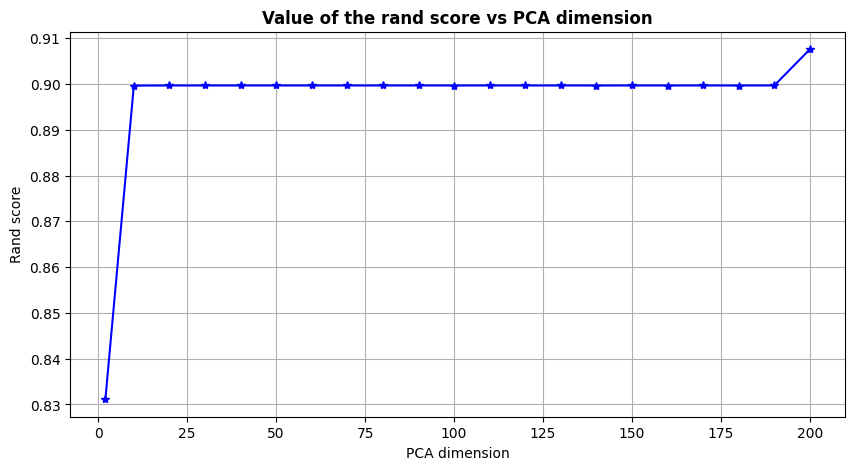

In [6]:
plot_rand_score_vs_PCA(PCA_DIMENSIONS, training_rand_scores, "train", "MeanShift")

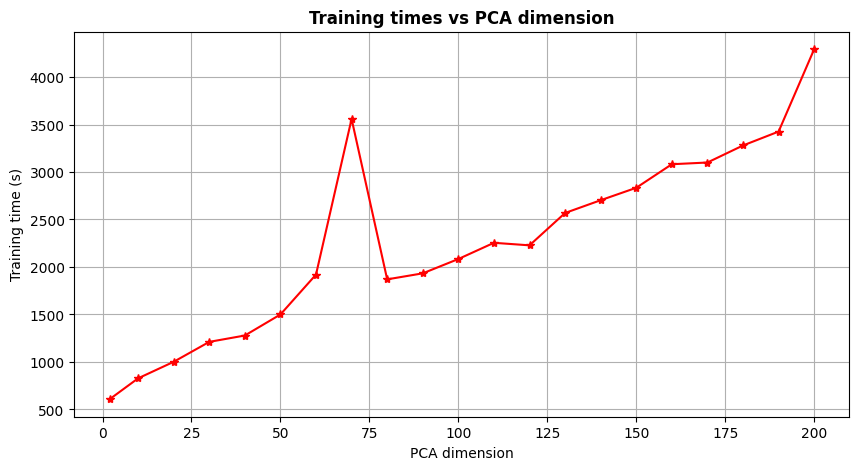

In [8]:
plot_training_time_vs_PCA(PCA_DIMENSIONS, training_times, "MeanShift")

In [9]:
best_estimators = get_best_estimators(meanshift)
testing_results = execute_estimators(best_estimators, "MeanShift", PCA_DIMENSIONS, DATASET_PERC)
testing_results

Executing MeanShift ..: 100%|██████████| 21/21 [00:14<00:00,  1.47it/s]


{2: (0.814217908680832,
  0.008537054061889648,
  18,
  array([0, 2, 1, ..., 8, 3, 2])),
 10: (0.8997001612475252,
  0.6872270107269287,
  5719,
  array([24631, 25775,  5553, ...,  1780, 20363,  7278])),
 20: (0.8997304104668014,
  0.625709056854248,
  5929,
  array([16515,   328,  4678, ...,    16, 20806,  8720])),
 30: (0.8997333496621966,
  0.5928928852081299,
  5990,
  array([23469, 14362, 15337, ...,  5129, 16394,  5554])),
 40: (0.8997312269099668,
  0.6107118129730225,
  5937,
  array([ 3978, 12201, 14221, ..., 15176, 20232,  9391])),
 50: (0.8997345335047864,
  0.6275670528411865,
  6026,
  array([14088,  8640, 19507, ..., 25528, 25850, 25060])),
 60: (0.8997302471781683,
  0.665311336517334,
  5924,
  array([24887, 11346, 10284, ...,  9927, 18898,  3340])),
 70: (0.8997318392423408,
  0.6695449352264404,
  5993,
  array([  919,  2723, 20598, ..., 13151, 14503, 19842])),
 80: (0.8997278794929888,
  0.6602129936218262,
  5915,
  array([26711, 18082, 24191, ..., 19665,  7389, 237

In [10]:
testing_rand_scores = get_testing_rand_scores(testing_results)
testing_rand_scores

[0.814217908680832,
 0.8997001612475252,
 0.8997304104668014,
 0.8997333496621966,
 0.8997312269099668,
 0.8997345335047864,
 0.8997302471781683,
 0.8997318392423408,
 0.8997278794929888,
 0.8997309003327006,
 0.8997295940236361,
 0.8997309003327006,
 0.8997291858020533,
 0.8997291449798951,
 0.8997315534872329,
 0.8997280836037801,
 0.8997303288224848,
 0.8997283285367297,
 0.8997304104668014,
 0.8997282877145715,
 0.9066582164799053]

In [11]:
testing_times = get_testing_times(testing_results)
testing_times

[0.008537054061889648,
 0.6872270107269287,
 0.625709056854248,
 0.5928928852081299,
 0.6107118129730225,
 0.6275670528411865,
 0.665311336517334,
 0.6695449352264404,
 0.6602129936218262,
 0.7274198532104492,
 0.7314560413360596,
 0.7086820602416992,
 0.7162768840789795,
 0.7493689060211182,
 0.7703077793121338,
 0.8499510288238525,
 0.8407318592071533,
 0.8431789875030518,
 0.8483269214630127,
 0.8427319526672363,
 0.25359487533569336]

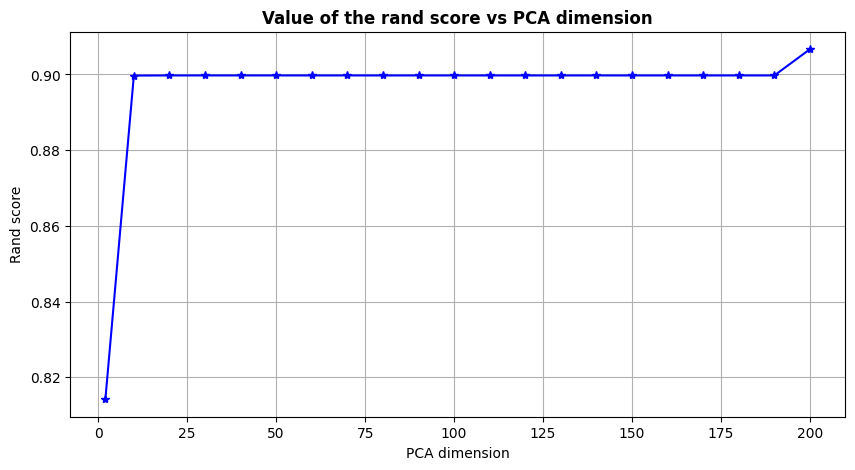

In [12]:
plot_rand_score_vs_PCA(PCA_DIMENSIONS, testing_rand_scores, "test", "MeanShift")

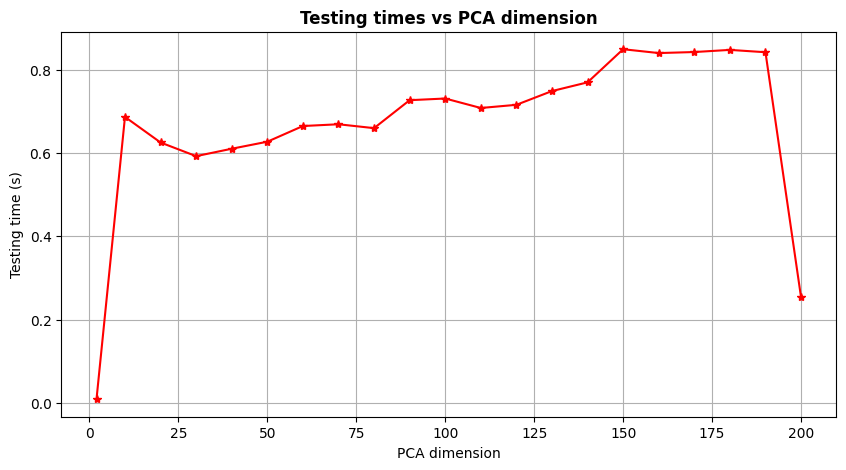

In [13]:
plot_testing_time_vs_PCA(PCA_DIMENSIONS, testing_times, "MeanShift")

In [14]:
labels = get_labels(testing_results)
labels

[array([0, 2, 1, ..., 8, 3, 2]),
 array([24631, 25775,  5553, ...,  1780, 20363,  7278]),
 array([16515,   328,  4678, ...,    16, 20806,  8720]),
 array([23469, 14362, 15337, ...,  5129, 16394,  5554]),
 array([ 3978, 12201, 14221, ..., 15176, 20232,  9391]),
 array([14088,  8640, 19507, ..., 25528, 25850, 25060]),
 array([24887, 11346, 10284, ...,  9927, 18898,  3340]),
 array([  919,  2723, 20598, ..., 13151, 14503, 19842]),
 array([26711, 18082, 24191, ..., 19665,  7389, 23715]),
 array([24376, 12920, 21592, ...,  3735, 10487,  1821]),
 array([    7, 15095, 15099, ..., 11745,  3996, 14271]),
 array([27443, 13036, 26859, ..., 21138, 18162, 18661]),
 array([  712, 20872,  2543, ...,  4664, 21161,  4270]),
 array([11439,  6580, 22396, ...,  4403, 12130,  4166]),
 array([19118, 19250, 27161, ..., 26056, 27895, 16552]),
 array([  887, 24235,  5668, ..., 20886,  8286, 16078]),
 array([25667, 15475, 17067, ..., 12105, 27312, 16034]),
 array([ 7713, 11191, 21274, ..., 11836, 18351,  8776])

In [15]:
n_clusters = get_n_clusters_testing(testing_results)
n_clusters

[18,
 5719,
 5929,
 5990,
 5937,
 6026,
 5924,
 5993,
 5915,
 5965,
 5927,
 5926,
 5966,
 5907,
 5927,
 5906,
 5893,
 5909,
 5918,
 5899,
 2402]

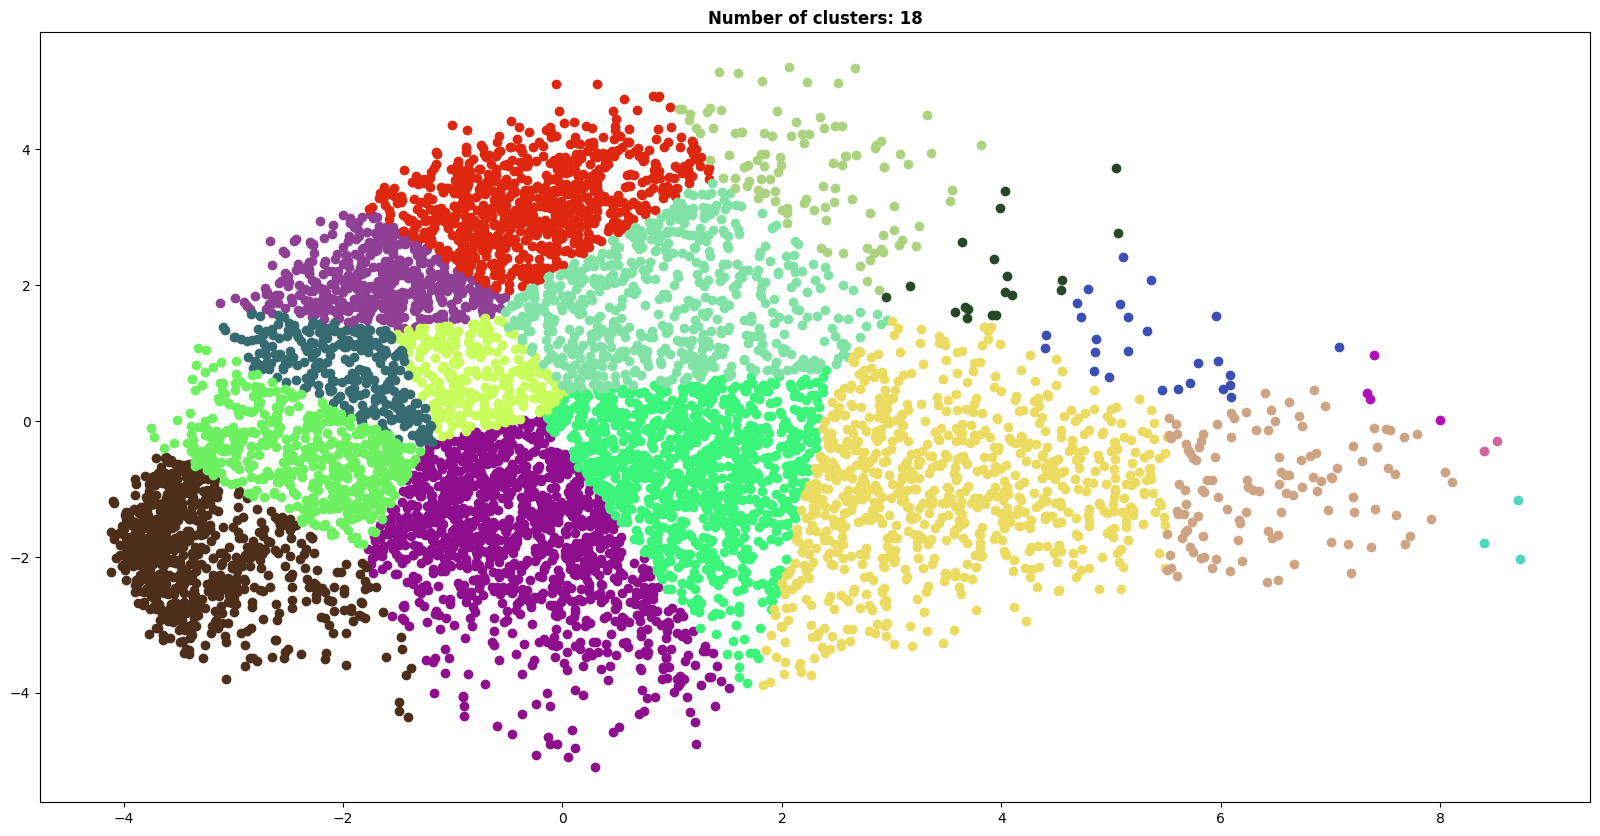

In [18]:
plot_clusters(DATASET_PERC, n_clusters[0], labels[0], "MeanShift")

Loading the PCA testing datasets..: 100%|██████████| 21/21 [00:00<00:00, 129.18it/s]
/Users/nicolaaggio/Desktop/UNI/Clustering/plot.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


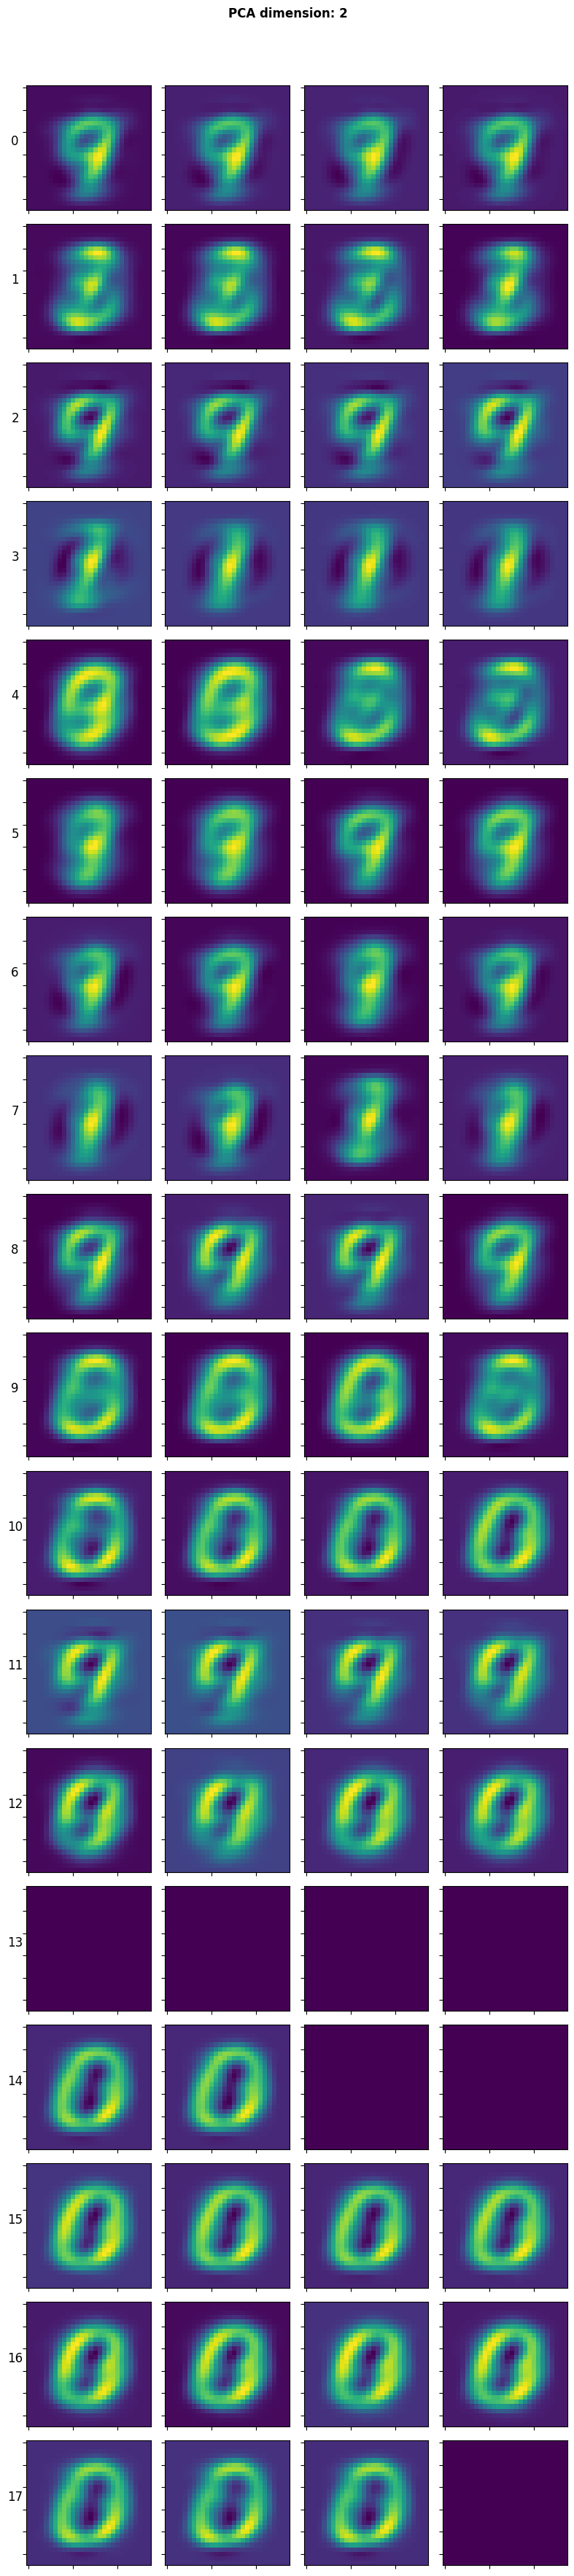

In [20]:
X_test, _ = load_PCA_test_sets(PCA_DIMENSIONS, DATASET_PERC)
plot_images_per_cluster(X_test, 2, labels[0], n_clusters[0], "MeanShift")